[datacamp link](https://www.datacamp.com/courses/unsupervised-learning-in-python)

In [0]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [0]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.stats import pearsonr
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.sparse import csr_matrix

## 1. Clustering for dataset exploration

#### Unsupervised learning

In [0]:
import matplotlib.pyplot as plt

In [0]:
#@title
points = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

In [0]:
points.shape

(300, 2)

You are given an array points of size 300x2, where each row gives the `(x, y)` co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

*   Create an array called `xs` that contains the values of points[:, 0] - that is, column 0 of points.
*   Create an array called `ys` that contains the values of points[:, 1] - that is, column 1 of points.
*   Make a scatter plot by passing xs and ys to the `plt.scatter()` function.
*   Call the `plt.show()` function to show your plot.



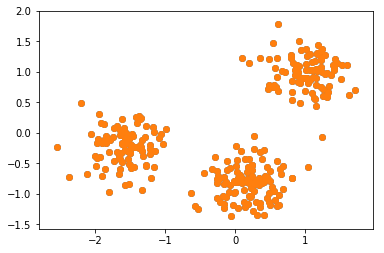

In [0]:
xs = points[:, 0]
ys = points[:, 1]
plt.scatter(xs, ys)
plt.scatter(xs, ys)

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.


*You are given the array points from the previous exercise, and also an array `new_points`.*

In [0]:
#@title
new_points = np.array([[  4.00233332e-01,  -1.26544471e+00],
       [  8.03230370e-01,   1.28260167e+00],
       [ -1.39507552e+00,   5.57292921e-02],
       [ -3.41192677e-01,  -1.07661994e+00],
       [  1.54781747e+00,   1.40250049e+00],
       [  2.45032018e-01,  -4.83442328e-01],
       [  1.20706886e+00,   8.88752605e-01],
       [  1.25132628e+00,   1.15555395e+00],
       [  1.81004415e+00,   9.65530731e-01],
       [ -1.66963401e+00,  -3.08103509e-01],
       [ -7.17482105e-02,  -9.37939700e-01],
       [  6.82631927e-01,   1.10258160e+00],
       [  1.09039598e+00,   1.43899529e+00],
       [ -1.67645414e+00,  -5.04557049e-01],
       [ -1.84447804e+00,   4.52539544e-02],
       [  1.24234851e+00,   1.02088661e+00],
       [ -1.86147041e+00,   6.38645811e-03],
       [ -1.46044943e+00,   1.53252383e-01],
       [  4.98981817e-01,   8.98006058e-01],
       [  9.83962244e-01,   1.04369375e+00],
       [ -1.83136742e+00,  -1.63632835e-01],
       [  1.30622617e+00,   1.07658717e+00],
       [  3.53420328e-01,  -7.51320218e-01],
       [  1.13957970e+00,   1.54503860e+00],
       [  2.93995694e-01,  -1.26135005e+00],
       [ -1.14558225e+00,  -3.78709636e-02],
       [  1.18716105e+00,   6.00240663e-01],
       [ -2.23211946e+00,   2.30475094e-01],
       [ -1.28320430e+00,  -3.93314568e-01],
       [  4.94296696e-01,  -8.83972009e-01],
       [  6.31834930e-02,  -9.11952228e-01],
       [  9.35759539e-01,   8.66820685e-01],
       [  1.58014721e+00,   1.03788392e+00],
       [  1.06304960e+00,   1.02706082e+00],
       [ -1.39732536e+00,  -5.05162249e-01],
       [ -1.09935240e-01,  -9.08113619e-01],
       [  1.17346758e+00,   9.47501092e-01],
       [  9.20084511e-01,   1.45767672e+00],
       [  5.82658956e-01,  -9.00086832e-01],
       [  9.52772328e-01,   8.99042386e-01],
       [ -1.37266956e+00,  -3.17878215e-02],
       [  2.12706760e-02,  -7.07614194e-01],
       [  3.27049052e-01,  -5.55998107e-01],
       [ -1.71590267e+00,   2.15222266e-01],
       [  5.12516209e-01,  -7.60128245e-01],
       [  1.13023469e+00,   7.22451122e-01],
       [ -1.43074310e+00,  -3.42787511e-01],
       [ -1.82724625e+00,   1.17657775e-01],
       [  1.41801350e+00,   1.11455080e+00],
       [  1.26897304e+00,   1.41925971e+00],
       [  8.04076494e-01,   1.63988557e+00],
       [  8.34567752e-01,   1.09956689e+00],
       [ -1.24714732e+00,  -2.23522320e-01],
       [ -1.29422537e+00,   8.18770024e-02],
       [ -2.27378316e-01,  -4.13331387e-01],
       [  2.18830387e-01,  -4.68183120e-01],
       [ -1.22593414e+00,   2.55599147e-01],
       [ -1.31294033e+00,  -4.28892070e-01],
       [ -1.33532382e+00,   6.52053776e-01],
       [ -3.01100233e-01,  -1.25156451e+00],
       [  2.02778356e-01,  -9.05277445e-01],
       [  1.01357784e+00,   1.12378981e+00],
       [  8.18324394e-01,   8.60841257e-01],
       [  1.26181556e+00,   1.46613744e+00],
       [  4.64867724e-01,  -7.97212459e-01],
       [  3.60908898e-01,   8.44106720e-01],
       [ -2.15098310e+00,  -3.69583937e-01],
       [  1.05005281e+00,   8.74181364e-01],
       [  1.06580074e-01,  -7.49268153e-01],
       [ -1.73945723e+00,   2.52183577e-01],
       [ -1.12017687e-01,  -6.52469788e-01],
       [  5.16618951e-01,  -6.41267582e-01],
       [  3.26621787e-01,  -8.80608015e-01],
       [  1.09017759e+00,   1.10952558e+00],
       [  3.64459576e-01,  -6.94215622e-01],
       [ -1.90779318e+00,   1.87383674e-01],
       [ -1.95601829e+00,   1.39959126e-01],
       [  3.18541701e-01,  -4.05271704e-01],
       [  7.36512699e-01,   1.76416255e+00],
       [ -1.44175162e+00,  -5.72320429e-02],
       [  3.21757168e-01,  -5.34283821e-01],
       [ -1.37317305e+00,   4.64484644e-02],
       [  6.87225910e-02,  -1.10522944e+00],
       [  9.59314218e-01,   6.52316210e-01],
       [ -1.62641919e+00,  -5.62423280e-01],
       [  1.06788305e+00,   7.29260482e-01],
       [ -1.79643547e+00,  -9.88307418e-01],
       [ -9.88628377e-02,  -6.81198092e-02],
       [ -1.05135700e-01,   1.17022143e+00],
       [  8.79964699e-01,   1.25340317e+00],
       [  9.80753407e-01,   1.15486539e+00],
       [ -8.33224966e-02,  -9.24844368e-01],
       [  8.48759673e-01,   1.09397425e+00],
       [  1.32941649e+00,   1.13734563e+00],
       [  3.23788068e-01,  -7.49732451e-01],
       [ -1.52610970e+00,  -2.49016929e-01],
       [ -1.48598116e+00,  -2.68828608e-01],
       [ -1.80479553e+00,   1.87052700e-01],
       [ -2.01907347e+00,  -4.49511651e-01],
       [  2.87202402e-01,  -6.55487415e-01],
       [  8.22295102e-01,   1.38443234e+00],
       [ -3.56997036e-02,  -8.01825807e-01],
       [ -1.66955440e+00,  -1.38258505e-01],
       [ -1.78226821e+00,   2.93353033e-01],
       [  7.25837138e-01,  -6.23374024e-01],
       [  3.88432593e-01,  -7.61283497e-01],
       [  1.49002783e+00,   7.95678671e-01],
       [  6.55423228e-04,  -7.40580702e-01],
       [ -1.34533116e+00,  -4.75629937e-01],
       [ -8.03845106e-01,  -3.09943013e-01],
       [ -2.49041295e-01,  -1.00662418e+00],
       [ -1.41095118e+00,  -7.06744127e-02],
       [ -1.75119594e+00,  -3.00491336e-01],
       [ -1.27942724e+00,   1.73774600e-01],
       [  3.35028183e-01,   6.24761151e-01],
       [  1.16819649e+00,   1.18902251e+00],
       [  7.15210457e-01,   9.26077419e-01],
       [  1.30057278e+00,   9.16349565e-01],
       [ -1.21697008e+00,   1.10039477e-01],
       [ -1.70707935e+00,  -5.99659536e-02],
       [  1.20730655e+00,   1.05480463e+00],
       [  1.86896009e-01,  -9.58047234e-01],
       [  8.03463471e-01,   3.86133140e-01],
       [ -1.73486790e+00,  -1.49831913e-01],
       [  1.31261499e+00,   1.11802982e+00],
       [  4.04993148e-01,  -5.10900347e-01],
       [ -1.93267968e+00,   2.20764694e-01],
       [  6.56004799e-01,   9.61887161e-01],
       [ -1.40588215e+00,   1.17134403e-01],
       [ -1.74306264e+00,  -7.47473959e-02],
       [  5.43745412e-01,   1.47209224e+00],
       [ -1.97331669e+00,  -2.27124493e-01],
       [  1.53901171e+00,   1.36049081e+00],
       [ -1.48323452e+00,  -4.90302063e-01],
       [  3.86748484e-01,  -1.26173400e+00],
       [  1.17015716e+00,   1.18549415e+00],
       [ -8.05381721e-02,  -3.21923627e-01],
       [ -6.82273156e-02,  -8.52825887e-01],
       [  7.13500028e-01,   1.27868520e+00],
       [ -1.85014378e+00,  -5.03490558e-01],
       [  6.36085266e-02,  -1.41257040e+00],
       [  1.52966062e+00,   9.66056572e-01],
       [  1.62165714e-01,  -1.37374843e+00],
       [ -3.23474497e-01,  -7.06620269e-01],
       [ -1.51768993e+00,   1.87658302e-01],
       [  8.88895911e-01,   7.62237161e-01],
       [  4.83164032e-01,   8.81931869e-01],
       [ -5.52997766e-02,  -7.11305016e-01],
       [ -1.57966441e+00,  -6.29220313e-01],
       [  5.51308645e-02,  -8.47206763e-01],
       [ -2.06001582e+00,   5.87697787e-02],
       [  1.11810855e+00,   1.30254175e+00],
       [  4.87016164e-01,  -9.90143937e-01],
       [ -1.65518042e+00,  -1.69386383e-01],
       [ -1.44349738e+00,   1.90299243e-01],
       [ -1.70074547e-01,  -8.26736022e-01],
       [ -1.82433979e+00,  -3.07814626e-01],
       [  1.03093485e+00,   1.26457691e+00],
       [  1.64431169e+00,   1.27773115e+00],
       [ -1.47617693e+00,   2.60783872e-02],
       [  1.00953067e+00,   1.14270181e+00],
       [ -1.45285636e+00,  -2.55216207e-01],
       [ -1.74092917e+00,  -8.34443177e-02],
       [  1.22038299e+00,   1.28699961e+00],
       [  9.16925397e-01,   7.32070275e-01],
       [ -1.60754185e-03,  -7.26375571e-01],
       [  8.93841238e-01,   8.41146643e-01],
       [  6.33791961e-01,   1.00915134e+00],
       [ -1.47927075e+00,  -6.99781936e-01],
       [  5.44799374e-02,  -1.06441970e+00],
       [ -1.51935568e+00,  -4.89276929e-01],
       [  2.89939026e-01,  -7.73145523e-01],
       [ -9.68154061e-03,  -1.13302207e+00],
       [  1.13474639e+00,   9.71541744e-01],
       [  5.36421406e-01,  -8.47906388e-01],
       [  1.14759864e+00,   6.89915205e-01],
       [  5.73291902e-01,   7.90802710e-01],
       [  2.12377397e-01,  -6.07569808e-01],
       [  5.26579548e-01,  -8.15930264e-01],
       [ -2.01831641e+00,   6.78650740e-02],
       [ -2.35512624e-01,  -1.08205132e+00],
       [  1.59274780e-01,  -6.00717261e-01],
       [  2.28120356e-01,  -1.16003549e+00],
       [ -1.53658378e+00,   8.40798808e-02],
       [  1.13954609e+00,   6.31782001e-01],
       [  1.01119255e+00,   1.04360805e+00],
       [ -1.42039867e-01,  -4.81230337e-01],
       [ -2.23120182e+00,   8.49162905e-02],
       [  1.25554811e-01,  -1.01794793e+00],
       [ -1.72493509e+00,  -6.94426177e-01],
       [ -1.60434630e+00,   4.45550868e-01],
       [  7.37153979e-01,   9.26560744e-01],
       [  6.72905271e-01,   1.13366030e+00],
       [  1.20066456e+00,   7.26273093e-01],
       [  7.58747209e-02,  -9.83378326e-01],
       [  1.28783262e+00,   1.18088601e+00],
       [  1.06521930e+00,   1.00714746e+00],
       [  1.05871698e+00,   1.12956519e+00],
       [ -1.12643410e+00,   1.66787744e-01],
       [ -1.10157218e+00,  -3.64137806e-01],
       [  2.35118217e-01,  -1.39769949e-01],
       [  1.13853795e+00,   1.01018519e+00],
       [  5.31205654e-01,  -8.81990792e-01],
       [  4.33085936e-01,  -7.64059042e-01],
       [ -4.48926156e-03,  -1.30548411e+00],
       [ -1.76348589e+00,  -4.97430739e-01],
       [  1.36485681e+00,   5.83404699e-01],
       [  5.66923900e-01,   1.51391963e+00],
       [  1.35736826e+00,   6.70915318e-01],
       [  1.07173397e+00,   6.11990884e-01],
       [  1.00106915e+00,   8.93815326e-01],
       [  1.33091007e+00,   8.79773879e-01],
       [ -1.79603740e+00,  -3.53883973e-02],
       [ -1.27222979e+00,   4.00156642e-01],
       [  8.47480603e-01,   1.17032364e+00],
       [ -1.50989129e+00,  -7.12318330e-01],
       [ -1.24953576e+00,  -5.57859730e-01],
       [ -1.27717973e+00,  -5.99350550e-01],
       [ -1.81946743e+00,   7.37057673e-01],
       [  1.19949867e+00,   1.56969386e+00],
       [ -1.25543847e+00,  -2.33892826e-01],
       [ -1.63052058e+00,   1.61455865e-01],
       [  1.10611305e+00,   7.39698224e-01],
       [  6.70193192e-01,   8.70567001e-01],
       [  3.69670156e-01,  -6.94645306e-01],
       [ -1.26362293e+00,  -6.99249285e-01],
       [ -3.66687507e-01,  -1.35310260e+00],
       [  2.44032147e-01,  -6.59470793e-01],
       [ -1.27679142e+00,  -4.85453412e-01],
       [  3.77473612e-02,  -6.99251605e-01],
       [ -2.19148539e+00,  -4.91199500e-01],
       [ -2.93277777e-01,  -5.89488212e-01],
       [ -1.65737397e+00,  -2.98337786e-01],
       [  7.36638861e-01,   5.78037057e-01],
       [  1.13709081e+00,   1.30119754e+00],
       [ -1.44146601e+00,   3.13934680e-02],
       [  5.92360708e-01,   1.22545114e+00],
       [  6.51719414e-01,   4.92674894e-01],
       [  5.94559139e-01,   8.25637315e-01],
       [ -1.87900722e+00,  -5.21899626e-01],
       [  2.15225041e-01,  -1.28269851e+00],
       [  4.99145965e-01,  -6.70268634e-01],
       [ -1.82954176e+00,  -3.39269731e-01],
       [  7.92721403e-01,   1.33785606e+00],
       [  9.54363372e-01,   9.80396626e-01],
       [ -1.35359846e+00,   1.03976340e-01],
       [  1.05595062e+00,   8.07031927e-01],
       [ -1.94311010e+00,  -1.18976964e-01],
       [ -1.39604137e+00,  -3.10095976e-01],
       [  1.28977624e+00,   1.01753365e+00],
       [ -1.59503139e+00,  -5.40574609e-01],
       [ -1.41994046e+00,  -3.81032569e-01],
       [ -2.35569801e-02,  -1.10133702e+00],
       [ -1.26038568e+00,  -6.93273886e-01],
       [  9.60215981e-01,  -8.11553694e-01],
       [  5.51803308e-01,  -1.01793176e+00],
       [  3.70185085e-01,  -1.06885468e+00],
       [  8.25529207e-01,   8.77007060e-01],
       [ -1.87032595e+00,   2.87507199e-01],
       [ -1.56260769e+00,  -1.89196712e-01],
       [ -1.26346548e+00,  -7.74725237e-01],
       [ -6.33800421e-02,  -7.59400611e-01],
       [  8.85298280e-01,   8.85620519e-01],
       [ -1.43324686e-01,  -1.16083678e+00],
       [ -1.83908725e+00,  -3.26655515e-01],
       [  2.74709229e-01,  -1.04546829e+00],
       [ -1.45703573e+00,  -2.91842036e-01],
       [ -1.59048842e+00,   1.66063031e-01],
       [  9.25549284e-01,   7.41406406e-01],
       [  1.97245469e-01,  -7.80703225e-01],
       [  2.88401697e-01,  -8.32425551e-01],
       [  7.24141618e-01,  -7.99149200e-01],
       [ -1.62658639e+00,  -1.80005543e-01],
       [  5.84481588e-01,   1.13195640e+00],
       [  1.02146732e+00,   4.59657799e-01],
       [  8.65050554e-01,   9.57714887e-01],
       [  3.98717766e-01,  -1.24273147e+00],
       [  8.62234892e-01,   1.10955561e+00],
       [ -1.35999430e+00,   2.49942654e-02],
       [ -1.19178505e+00,  -3.82946323e-02],
       [  1.29392424e+00,   1.10320509e+00],
       [  1.25679630e+00,  -7.79857582e-01],
       [  9.38040302e-02,  -5.53247258e-01],
       [ -1.73512175e+00,  -9.76271667e-02],
       [  2.23153587e-01,  -9.43474351e-01],
       [  4.01989100e-01,  -1.10963051e+00],
       [ -1.42244158e+00,   1.81914703e-01],
       [  3.92476267e-01,  -8.78426277e-01],
       [  1.25181875e+00,   6.93614996e-01],
       [  1.77481317e-02,  -7.20304235e-01],
       [ -1.87752521e+00,  -2.63870424e-01],
       [ -1.58063602e+00,  -5.50456344e-01],
       [ -1.59589493e+00,  -1.53932892e-01],
       [ -1.01829770e+00,   3.88542370e-02],
       [  1.24819659e+00,   6.60041803e-01],
       [ -1.25551377e+00,  -2.96172009e-02],
       [ -1.41864559e+00,  -3.58230179e-01],
       [  5.25758326e-01,   8.70500543e-01],
       [  5.55599988e-01,   1.18765072e+00],
       [  2.81344439e-02,  -6.99111314e-01]])

In [0]:
new_points.shape

(300, 2)

In [0]:
# Import KMeans
from sklearn.cluster import KMeans

In [0]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 1 0 2 1 2 1 1 1 0 2 1 1 0 0 1 0 0 1 1 0 1 2 1 2 0 1 0 0 2 2 1 1 1 0 2 1
 1 2 1 0 2 2 0 2 1 0 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 1 1 2 1 0 1 2 0 2 2 2 1
 2 0 0 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 1 1 2 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 2
 0 0 0 1 1 1 1 0 0 1 2 1 0 1 2 0 1 0 0 1 0 1 0 2 1 2 2 1 0 2 1 2 2 0 1 1 2
 0 2 0 1 2 0 0 2 0 1 1 0 1 0 0 1 1 2 1 1 0 2 0 2 2 1 2 1 1 2 2 0 2 2 2 0 1
 1 2 0 2 0 0 1 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 2 0 2 2 0 2 0 2 0 1 1 0 1 1 1 0 2 2 0 1 1 0 1 0 0 1 0 0 2 0 2 2 2 1 0
 0 0 2 1 2 0 2 0 0 1 2 2 2 0 1 1 1 2 1 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 0 1 0
 0 1 1 2]


But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful. In the next exercise, you'll inspect your clustering with a scatter plot!

In [0]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

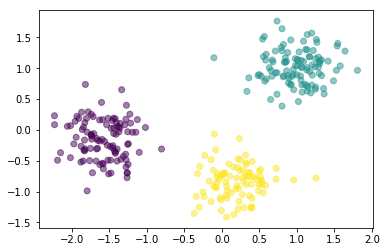

In [0]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

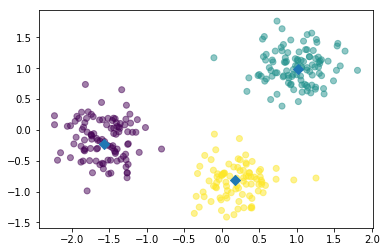

In [0]:
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

#### Evaluating a clustering

You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

In [0]:
#@title
samples = np.array([[ 15.26  ,  14.84  ,   0.871 ,   5.763 ,   3.312 ,   2.221 ,   5.22  ],
       [ 14.88  ,  14.57  ,   0.8811,   5.554 ,   3.333 ,   1.018 ,   4.956 ],
       [ 14.29  ,  14.09  ,   0.905 ,   5.291 ,   3.337 ,   2.699 ,   4.825 ],
       [ 13.84  ,  13.94  ,   0.8955,   5.324 ,   3.379 ,   2.259 ,   4.805 ],
       [ 16.14  ,  14.99  ,   0.9034,   5.658 ,   3.562 ,   1.355 ,   5.175 ],
       [ 14.38  ,  14.21  ,   0.8951,   5.386 ,   3.312 ,   2.462 ,   4.956 ],
       [ 14.69  ,  14.49  ,   0.8799,   5.563 ,   3.259 ,   3.586 ,   5.219 ],
       [ 14.11  ,  14.1   ,   0.8911,   5.42  ,   3.302 ,   2.7   ,   5.    ],
       [ 16.63  ,  15.46  ,   0.8747,   6.053 ,   3.465 ,   2.04  ,   5.877 ],
       [ 16.44  ,  15.25  ,   0.888 ,   5.884 ,   3.505 ,   1.969 ,   5.533 ],
       [ 15.26  ,  14.85  ,   0.8696,   5.714 ,   3.242 ,   4.543 ,   5.314 ],
       [ 14.03  ,  14.16  ,   0.8796,   5.438 ,   3.201 ,   1.717 ,   5.001 ],
       [ 13.89  ,  14.02  ,   0.888 ,   5.439 ,   3.199 ,   3.986 ,   4.738 ],
       [ 13.78  ,  14.06  ,   0.8759,   5.479 ,   3.156 ,   3.136 ,   4.872 ],
       [ 13.74  ,  14.05  ,   0.8744,   5.482 ,   3.114 ,   2.932 ,   4.825 ],
       [ 14.59  ,  14.28  ,   0.8993,   5.351 ,   3.333 ,   4.185 ,   4.781 ],
       [ 13.99  ,  13.83  ,   0.9183,   5.119 ,   3.383 ,   5.234 ,   4.781 ],
       [ 15.69  ,  14.75  ,   0.9058,   5.527 ,   3.514 ,   1.599 ,   5.046 ],
       [ 14.7   ,  14.21  ,   0.9153,   5.205 ,   3.466 ,   1.767 ,   4.649 ],
       [ 12.72  ,  13.57  ,   0.8686,   5.226 ,   3.049 ,   4.102 ,   4.914 ],
       [ 14.16  ,  14.4   ,   0.8584,   5.658 ,   3.129 ,   3.072 ,   5.176 ],
       [ 14.11  ,  14.26  ,   0.8722,   5.52  ,   3.168 ,   2.688 ,   5.219 ],
       [ 15.88  ,  14.9   ,   0.8988,   5.618 ,   3.507 ,   0.7651,   5.091 ],
       [ 12.08  ,  13.23  ,   0.8664,   5.099 ,   2.936 ,   1.415 ,   4.961 ],
       [ 15.01  ,  14.76  ,   0.8657,   5.789 ,   3.245 ,   1.791 ,   5.001 ],
       [ 16.19  ,  15.16  ,   0.8849,   5.833 ,   3.421 ,   0.903 ,   5.307 ],
       [ 13.02  ,  13.76  ,   0.8641,   5.395 ,   3.026 ,   3.373 ,   4.825 ],
       [ 12.74  ,  13.67  ,   0.8564,   5.395 ,   2.956 ,   2.504 ,   4.869 ],
       [ 14.11  ,  14.18  ,   0.882 ,   5.541 ,   3.221 ,   2.754 ,   5.038 ],
       [ 13.45  ,  14.02  ,   0.8604,   5.516 ,   3.065 ,   3.531 ,   5.097 ],
       [ 13.16  ,  13.82  ,   0.8662,   5.454 ,   2.975 ,   0.8551,   5.056 ],
       [ 15.49  ,  14.94  ,   0.8724,   5.757 ,   3.371 ,   3.412 ,   5.228 ],
       [ 14.09  ,  14.41  ,   0.8529,   5.717 ,   3.186 ,   3.92  ,   5.299 ],
       [ 13.94  ,  14.17  ,   0.8728,   5.585 ,   3.15  ,   2.124 ,   5.012 ],
       [ 15.05  ,  14.68  ,   0.8779,   5.712 ,   3.328 ,   2.129 ,   5.36  ],
       [ 16.12  ,  15.    ,   0.9   ,   5.709 ,   3.485 ,   2.27  ,   5.443 ],
       [ 16.2   ,  15.27  ,   0.8734,   5.826 ,   3.464 ,   2.823 ,   5.527 ],
       [ 17.08  ,  15.38  ,   0.9079,   5.832 ,   3.683 ,   2.956 ,   5.484 ],
       [ 14.8   ,  14.52  ,   0.8823,   5.656 ,   3.288 ,   3.112 ,   5.309 ],
       [ 14.28  ,  14.17  ,   0.8944,   5.397 ,   3.298 ,   6.685 ,   5.001 ],
       [ 13.54  ,  13.85  ,   0.8871,   5.348 ,   3.156 ,   2.587 ,   5.178 ],
       [ 13.5   ,  13.85  ,   0.8852,   5.351 ,   3.158 ,   2.249 ,   5.176 ],
       [ 13.16  ,  13.55  ,   0.9009,   5.138 ,   3.201 ,   2.461 ,   4.783 ],
       [ 15.5   ,  14.86  ,   0.882 ,   5.877 ,   3.396 ,   4.711 ,   5.528 ],
       [ 15.11  ,  14.54  ,   0.8986,   5.579 ,   3.462 ,   3.128 ,   5.18  ],
       [ 13.8   ,  14.04  ,   0.8794,   5.376 ,   3.155 ,   1.56  ,   4.961 ],
       [ 15.36  ,  14.76  ,   0.8861,   5.701 ,   3.393 ,   1.367 ,   5.132 ],
       [ 14.99  ,  14.56  ,   0.8883,   5.57  ,   3.377 ,   2.958 ,   5.175 ],
       [ 14.79  ,  14.52  ,   0.8819,   5.545 ,   3.291 ,   2.704 ,   5.111 ],
       [ 14.86  ,  14.67  ,   0.8676,   5.678 ,   3.258 ,   2.129 ,   5.351 ],
       [ 14.43  ,  14.4   ,   0.8751,   5.585 ,   3.272 ,   3.975 ,   5.144 ],
       [ 15.78  ,  14.91  ,   0.8923,   5.674 ,   3.434 ,   5.593 ,   5.136 ],
       [ 14.49  ,  14.61  ,   0.8538,   5.715 ,   3.113 ,   4.116 ,   5.396 ],
       [ 14.33  ,  14.28  ,   0.8831,   5.504 ,   3.199 ,   3.328 ,   5.224 ],
       [ 14.52  ,  14.6   ,   0.8557,   5.741 ,   3.113 ,   1.481 ,   5.487 ],
       [ 15.03  ,  14.77  ,   0.8658,   5.702 ,   3.212 ,   1.933 ,   5.439 ],
       [ 14.46  ,  14.35  ,   0.8818,   5.388 ,   3.377 ,   2.802 ,   5.044 ],
       [ 14.92  ,  14.43  ,   0.9006,   5.384 ,   3.412 ,   1.142 ,   5.088 ],
       [ 15.38  ,  14.77  ,   0.8857,   5.662 ,   3.419 ,   1.999 ,   5.222 ],
       [ 12.11  ,  13.47  ,   0.8392,   5.159 ,   3.032 ,   1.502 ,   4.519 ],
       [ 11.42  ,  12.86  ,   0.8683,   5.008 ,   2.85  ,   2.7   ,   4.607 ],
       [ 11.23  ,  12.63  ,   0.884 ,   4.902 ,   2.879 ,   2.269 ,   4.703 ],
       [ 12.36  ,  13.19  ,   0.8923,   5.076 ,   3.042 ,   3.22  ,   4.605 ],
       [ 13.22  ,  13.84  ,   0.868 ,   5.395 ,   3.07  ,   4.157 ,   5.088 ],
       [ 12.78  ,  13.57  ,   0.8716,   5.262 ,   3.026 ,   1.176 ,   4.782 ],
       [ 12.88  ,  13.5   ,   0.8879,   5.139 ,   3.119 ,   2.352 ,   4.607 ],
       [ 14.34  ,  14.37  ,   0.8726,   5.63  ,   3.19  ,   1.313 ,   5.15  ],
       [ 14.01  ,  14.29  ,   0.8625,   5.609 ,   3.158 ,   2.217 ,   5.132 ],
       [ 14.37  ,  14.39  ,   0.8726,   5.569 ,   3.153 ,   1.464 ,   5.3   ],
       [ 12.73  ,  13.75  ,   0.8458,   5.412 ,   2.882 ,   3.533 ,   5.067 ],
       [ 17.63  ,  15.98  ,   0.8673,   6.191 ,   3.561 ,   4.076 ,   6.06  ],
       [ 16.84  ,  15.67  ,   0.8623,   5.998 ,   3.484 ,   4.675 ,   5.877 ],
       [ 17.26  ,  15.73  ,   0.8763,   5.978 ,   3.594 ,   4.539 ,   5.791 ],
       [ 19.11  ,  16.26  ,   0.9081,   6.154 ,   3.93  ,   2.936 ,   6.079 ],
       [ 16.82  ,  15.51  ,   0.8786,   6.017 ,   3.486 ,   4.004 ,   5.841 ],
       [ 16.77  ,  15.62  ,   0.8638,   5.927 ,   3.438 ,   4.92  ,   5.795 ],
       [ 17.32  ,  15.91  ,   0.8599,   6.064 ,   3.403 ,   3.824 ,   5.922 ],
       [ 20.71  ,  17.23  ,   0.8763,   6.579 ,   3.814 ,   4.451 ,   6.451 ],
       [ 18.94  ,  16.49  ,   0.875 ,   6.445 ,   3.639 ,   5.064 ,   6.362 ],
       [ 17.12  ,  15.55  ,   0.8892,   5.85  ,   3.566 ,   2.858 ,   5.746 ],
       [ 16.53  ,  15.34  ,   0.8823,   5.875 ,   3.467 ,   5.532 ,   5.88  ],
       [ 18.72  ,  16.19  ,   0.8977,   6.006 ,   3.857 ,   5.324 ,   5.879 ],
       [ 20.2   ,  16.89  ,   0.8894,   6.285 ,   3.864 ,   5.173 ,   6.187 ],
       [ 19.57  ,  16.74  ,   0.8779,   6.384 ,   3.772 ,   1.472 ,   6.273 ],
       [ 19.51  ,  16.71  ,   0.878 ,   6.366 ,   3.801 ,   2.962 ,   6.185 ],
       [ 18.27  ,  16.09  ,   0.887 ,   6.173 ,   3.651 ,   2.443 ,   6.197 ],
       [ 18.88  ,  16.26  ,   0.8969,   6.084 ,   3.764 ,   1.649 ,   6.109 ],
       [ 18.98  ,  16.66  ,   0.859 ,   6.549 ,   3.67  ,   3.691 ,   6.498 ],
       [ 21.18  ,  17.21  ,   0.8989,   6.573 ,   4.033 ,   5.78  ,   6.231 ],
       [ 20.88  ,  17.05  ,   0.9031,   6.45  ,   4.032 ,   5.016 ,   6.321 ],
       [ 20.1   ,  16.99  ,   0.8746,   6.581 ,   3.785 ,   1.955 ,   6.449 ],
       [ 18.76  ,  16.2   ,   0.8984,   6.172 ,   3.796 ,   3.12  ,   6.053 ],
       [ 18.81  ,  16.29  ,   0.8906,   6.272 ,   3.693 ,   3.237 ,   6.053 ],
       [ 18.59  ,  16.05  ,   0.9066,   6.037 ,   3.86  ,   6.001 ,   5.877 ],
       [ 18.36  ,  16.52  ,   0.8452,   6.666 ,   3.485 ,   4.933 ,   6.448 ],
       [ 16.87  ,  15.65  ,   0.8648,   6.139 ,   3.463 ,   3.696 ,   5.967 ],
       [ 19.31  ,  16.59  ,   0.8815,   6.341 ,   3.81  ,   3.477 ,   6.238 ],
       [ 18.98  ,  16.57  ,   0.8687,   6.449 ,   3.552 ,   2.144 ,   6.453 ],
       [ 18.17  ,  16.26  ,   0.8637,   6.271 ,   3.512 ,   2.853 ,   6.273 ],
       [ 18.72  ,  16.34  ,   0.881 ,   6.219 ,   3.684 ,   2.188 ,   6.097 ],
       [ 16.41  ,  15.25  ,   0.8866,   5.718 ,   3.525 ,   4.217 ,   5.618 ],
       [ 17.99  ,  15.86  ,   0.8992,   5.89  ,   3.694 ,   2.068 ,   5.837 ],
       [ 19.46  ,  16.5   ,   0.8985,   6.113 ,   3.892 ,   4.308 ,   6.009 ],
       [ 19.18  ,  16.63  ,   0.8717,   6.369 ,   3.681 ,   3.357 ,   6.229 ],
       [ 18.95  ,  16.42  ,   0.8829,   6.248 ,   3.755 ,   3.368 ,   6.148 ],
       [ 18.83  ,  16.29  ,   0.8917,   6.037 ,   3.786 ,   2.553 ,   5.879 ],
       [ 18.85  ,  16.17  ,   0.9056,   6.152 ,   3.806 ,   2.843 ,   6.2   ],
       [ 17.63  ,  15.86  ,   0.88  ,   6.033 ,   3.573 ,   3.747 ,   5.929 ],
       [ 19.94  ,  16.92  ,   0.8752,   6.675 ,   3.763 ,   3.252 ,   6.55  ],
       [ 18.55  ,  16.22  ,   0.8865,   6.153 ,   3.674 ,   1.738 ,   5.894 ],
       [ 18.45  ,  16.12  ,   0.8921,   6.107 ,   3.769 ,   2.235 ,   5.794 ],
       [ 19.38  ,  16.72  ,   0.8716,   6.303 ,   3.791 ,   3.678 ,   5.965 ],
       [ 19.13  ,  16.31  ,   0.9035,   6.183 ,   3.902 ,   2.109 ,   5.924 ],
       [ 19.14  ,  16.61  ,   0.8722,   6.259 ,   3.737 ,   6.682 ,   6.053 ],
       [ 20.97  ,  17.25  ,   0.8859,   6.563 ,   3.991 ,   4.677 ,   6.316 ],
       [ 19.06  ,  16.45  ,   0.8854,   6.416 ,   3.719 ,   2.248 ,   6.163 ],
       [ 18.96  ,  16.2   ,   0.9077,   6.051 ,   3.897 ,   4.334 ,   5.75  ],
       [ 19.15  ,  16.45  ,   0.889 ,   6.245 ,   3.815 ,   3.084 ,   6.185 ],
       [ 18.89  ,  16.23  ,   0.9008,   6.227 ,   3.769 ,   3.639 ,   5.966 ],
       [ 20.03  ,  16.9   ,   0.8811,   6.493 ,   3.857 ,   3.063 ,   6.32  ],
       [ 20.24  ,  16.91  ,   0.8897,   6.315 ,   3.962 ,   5.901 ,   6.188 ],
       [ 18.14  ,  16.12  ,   0.8772,   6.059 ,   3.563 ,   3.619 ,   6.011 ],
       [ 16.17  ,  15.38  ,   0.8588,   5.762 ,   3.387 ,   4.286 ,   5.703 ],
       [ 18.43  ,  15.97  ,   0.9077,   5.98  ,   3.771 ,   2.984 ,   5.905 ],
       [ 15.99  ,  14.89  ,   0.9064,   5.363 ,   3.582 ,   3.336 ,   5.144 ],
       [ 18.75  ,  16.18  ,   0.8999,   6.111 ,   3.869 ,   4.188 ,   5.992 ],
       [ 18.65  ,  16.41  ,   0.8698,   6.285 ,   3.594 ,   4.391 ,   6.102 ],
       [ 17.98  ,  15.85  ,   0.8993,   5.979 ,   3.687 ,   2.257 ,   5.919 ],
       [ 20.16  ,  17.03  ,   0.8735,   6.513 ,   3.773 ,   1.91  ,   6.185 ],
       [ 17.55  ,  15.66  ,   0.8991,   5.791 ,   3.69  ,   5.366 ,   5.661 ],
       [ 18.3   ,  15.89  ,   0.9108,   5.979 ,   3.755 ,   2.837 ,   5.962 ],
       [ 18.94  ,  16.32  ,   0.8942,   6.144 ,   3.825 ,   2.908 ,   5.949 ],
       [ 15.38  ,  14.9   ,   0.8706,   5.884 ,   3.268 ,   4.462 ,   5.795 ],
       [ 16.16  ,  15.33  ,   0.8644,   5.845 ,   3.395 ,   4.266 ,   5.795 ],
       [ 15.56  ,  14.89  ,   0.8823,   5.776 ,   3.408 ,   4.972 ,   5.847 ],
       [ 15.38  ,  14.66  ,   0.899 ,   5.477 ,   3.465 ,   3.6   ,   5.439 ],
       [ 17.36  ,  15.76  ,   0.8785,   6.145 ,   3.574 ,   3.526 ,   5.971 ],
       [ 15.57  ,  15.15  ,   0.8527,   5.92  ,   3.231 ,   2.64  ,   5.879 ],
       [ 15.6   ,  15.11  ,   0.858 ,   5.832 ,   3.286 ,   2.725 ,   5.752 ],
       [ 16.23  ,  15.18  ,   0.885 ,   5.872 ,   3.472 ,   3.769 ,   5.922 ],
       [ 13.07  ,  13.92  ,   0.848 ,   5.472 ,   2.994 ,   5.304 ,   5.395 ],
       [ 13.32  ,  13.94  ,   0.8613,   5.541 ,   3.073 ,   7.035 ,   5.44  ],
       [ 13.34  ,  13.95  ,   0.862 ,   5.389 ,   3.074 ,   5.995 ,   5.307 ],
       [ 12.22  ,  13.32  ,   0.8652,   5.224 ,   2.967 ,   5.469 ,   5.221 ],
       [ 11.82  ,  13.4   ,   0.8274,   5.314 ,   2.777 ,   4.471 ,   5.178 ],
       [ 11.21  ,  13.13  ,   0.8167,   5.279 ,   2.687 ,   6.169 ,   5.275 ],
       [ 11.43  ,  13.13  ,   0.8335,   5.176 ,   2.719 ,   2.221 ,   5.132 ],
       [ 12.49  ,  13.46  ,   0.8658,   5.267 ,   2.967 ,   4.421 ,   5.002 ],
       [ 12.7   ,  13.71  ,   0.8491,   5.386 ,   2.911 ,   3.26  ,   5.316 ],
       [ 10.79  ,  12.93  ,   0.8107,   5.317 ,   2.648 ,   5.462 ,   5.194 ],
       [ 11.83  ,  13.23  ,   0.8496,   5.263 ,   2.84  ,   5.195 ,   5.307 ],
       [ 12.01  ,  13.52  ,   0.8249,   5.405 ,   2.776 ,   6.992 ,   5.27  ],
       [ 12.26  ,  13.6   ,   0.8333,   5.408 ,   2.833 ,   4.756 ,   5.36  ],
       [ 11.18  ,  13.04  ,   0.8266,   5.22  ,   2.693 ,   3.332 ,   5.001 ],
       [ 11.36  ,  13.05  ,   0.8382,   5.175 ,   2.755 ,   4.048 ,   5.263 ],
       [ 11.19  ,  13.05  ,   0.8253,   5.25  ,   2.675 ,   5.813 ,   5.219 ],
       [ 11.34  ,  12.87  ,   0.8596,   5.053 ,   2.849 ,   3.347 ,   5.003 ],
       [ 12.13  ,  13.73  ,   0.8081,   5.394 ,   2.745 ,   4.825 ,   5.22  ],
       [ 11.75  ,  13.52  ,   0.8082,   5.444 ,   2.678 ,   4.378 ,   5.31  ],
       [ 11.49  ,  13.22  ,   0.8263,   5.304 ,   2.695 ,   5.388 ,   5.31  ],
       [ 12.54  ,  13.67  ,   0.8425,   5.451 ,   2.879 ,   3.082 ,   5.491 ],
       [ 12.02  ,  13.33  ,   0.8503,   5.35  ,   2.81  ,   4.271 ,   5.308 ],
       [ 12.05  ,  13.41  ,   0.8416,   5.267 ,   2.847 ,   4.988 ,   5.046 ],
       [ 12.55  ,  13.57  ,   0.8558,   5.333 ,   2.968 ,   4.419 ,   5.176 ],
       [ 11.14  ,  12.79  ,   0.8558,   5.011 ,   2.794 ,   6.388 ,   5.049 ],
       [ 12.1   ,  13.15  ,   0.8793,   5.105 ,   2.941 ,   2.201 ,   5.056 ],
       [ 12.44  ,  13.59  ,   0.8462,   5.319 ,   2.897 ,   4.924 ,   5.27  ],
       [ 12.15  ,  13.45  ,   0.8443,   5.417 ,   2.837 ,   3.638 ,   5.338 ],
       [ 11.35  ,  13.12  ,   0.8291,   5.176 ,   2.668 ,   4.337 ,   5.132 ],
       [ 11.24  ,  13.    ,   0.8359,   5.09  ,   2.715 ,   3.521 ,   5.088 ],
       [ 11.02  ,  13.    ,   0.8189,   5.325 ,   2.701 ,   6.735 ,   5.163 ],
       [ 11.55  ,  13.1   ,   0.8455,   5.167 ,   2.845 ,   6.715 ,   4.956 ],
       [ 11.27  ,  12.97  ,   0.8419,   5.088 ,   2.763 ,   4.309 ,   5.    ],
       [ 11.4   ,  13.08  ,   0.8375,   5.136 ,   2.763 ,   5.588 ,   5.089 ],
       [ 10.83  ,  12.96  ,   0.8099,   5.278 ,   2.641 ,   5.182 ,   5.185 ],
       [ 10.8   ,  12.57  ,   0.859 ,   4.981 ,   2.821 ,   4.773 ,   5.063 ],
       [ 11.26  ,  13.01  ,   0.8355,   5.186 ,   2.71  ,   5.335 ,   5.092 ],
       [ 10.74  ,  12.73  ,   0.8329,   5.145 ,   2.642 ,   4.702 ,   4.963 ],
       [ 11.48  ,  13.05  ,   0.8473,   5.18  ,   2.758 ,   5.876 ,   5.002 ],
       [ 12.21  ,  13.47  ,   0.8453,   5.357 ,   2.893 ,   1.661 ,   5.178 ],
       [ 11.41  ,  12.95  ,   0.856 ,   5.09  ,   2.775 ,   4.957 ,   4.825 ],
       [ 12.46  ,  13.41  ,   0.8706,   5.236 ,   3.017 ,   4.987 ,   5.147 ],
       [ 12.19  ,  13.36  ,   0.8579,   5.24  ,   2.909 ,   4.857 ,   5.158 ],
       [ 11.65  ,  13.07  ,   0.8575,   5.108 ,   2.85  ,   5.209 ,   5.135 ],
       [ 12.89  ,  13.77  ,   0.8541,   5.495 ,   3.026 ,   6.185 ,   5.316 ],
       [ 11.56  ,  13.31  ,   0.8198,   5.363 ,   2.683 ,   4.062 ,   5.182 ],
       [ 11.81  ,  13.45  ,   0.8198,   5.413 ,   2.716 ,   4.898 ,   5.352 ],
       [ 10.91  ,  12.8   ,   0.8372,   5.088 ,   2.675 ,   4.179 ,   4.956 ],
       [ 11.23  ,  12.82  ,   0.8594,   5.089 ,   2.821 ,   7.524 ,   4.957 ],
       [ 10.59  ,  12.41  ,   0.8648,   4.899 ,   2.787 ,   4.975 ,   4.794 ],
       [ 10.93  ,  12.8   ,   0.839 ,   5.046 ,   2.717 ,   5.398 ,   5.045 ],
       [ 11.27  ,  12.86  ,   0.8563,   5.091 ,   2.804 ,   3.985 ,   5.001 ],
       [ 11.87  ,  13.02  ,   0.8795,   5.132 ,   2.953 ,   3.597 ,   5.132 ],
       [ 10.82  ,  12.83  ,   0.8256,   5.18  ,   2.63  ,   4.853 ,   5.089 ],
       [ 12.11  ,  13.27  ,   0.8639,   5.236 ,   2.975 ,   4.132 ,   5.012 ],
       [ 12.8   ,  13.47  ,   0.886 ,   5.16  ,   3.126 ,   4.873 ,   4.914 ],
       [ 12.79  ,  13.53  ,   0.8786,   5.224 ,   3.054 ,   5.483 ,   4.958 ],
       [ 13.37  ,  13.78  ,   0.8849,   5.32  ,   3.128 ,   4.67  ,   5.091 ],
       [ 12.62  ,  13.67  ,   0.8481,   5.41  ,   2.911 ,   3.306 ,   5.231 ],
       [ 12.76  ,  13.38  ,   0.8964,   5.073 ,   3.155 ,   2.828 ,   4.83  ],
       [ 12.38  ,  13.44  ,   0.8609,   5.219 ,   2.989 ,   5.472 ,   5.045 ],
       [ 12.67  ,  13.32  ,   0.8977,   4.984 ,   3.135 ,   2.3   ,   4.745 ],
       [ 11.18  ,  12.72  ,   0.868 ,   5.009 ,   2.81  ,   4.051 ,   4.828 ],
       [ 12.7   ,  13.41  ,   0.8874,   5.183 ,   3.091 ,   8.456 ,   5.    ],
       [ 12.37  ,  13.47  ,   0.8567,   5.204 ,   2.96  ,   3.919 ,   5.001 ],
       [ 12.19  ,  13.2   ,   0.8783,   5.137 ,   2.981 ,   3.631 ,   4.87  ],
       [ 11.23  ,  12.88  ,   0.8511,   5.14  ,   2.795 ,   4.325 ,   5.003 ],
       [ 13.2   ,  13.66  ,   0.8883,   5.236 ,   3.232 ,   8.315 ,   5.056 ],
       [ 11.84  ,  13.21  ,   0.8521,   5.175 ,   2.836 ,   3.598 ,   5.044 ],
       [ 12.3   ,  13.34  ,   0.8684,   5.243 ,   2.974 ,   5.637 ,   5.063 ]])

In [0]:
samples.shape # (210, 7)

(210, 7)

In [0]:
ks = range(1, 6)
inertias = []

In [0]:
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

In [0]:
inertias

[2719.852410177952,
 1011.7123453151189,
 587.3186115940427,
 471.00339552519216,
 385.62847109679774]

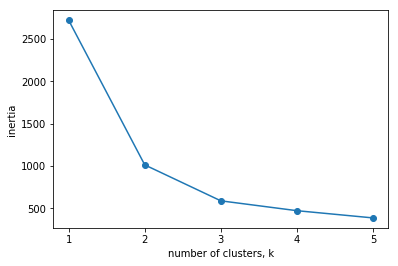

In [0]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. `Pandas` (pd) and `KMeans` have already been imported for you.

In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [0]:
#@title
varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

In [0]:
len(varieties)

210

In [0]:
df = pd.read_csv('/content/seeds.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [0]:
df.shape # (210, 8)

(210, 8)

In [0]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                      68           9           0
2                       0           1          60


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. 

#### Transforming features for better clusterings

In [0]:
fish = pd.read_csv('/content/fish.csv', header=None)
# fish.head
fish.shape

(85, 7)

In [0]:
samples = fish.drop(0, axis=1).values
samples.shape # (85, 6)

(85, 6)

In [0]:
species = fish[0]
len(species)

85

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. 

In this exercise, you'll build a pipeline to standardize and cluster the data.

In [0]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [0]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


In this exercise, you'll **cluster companies using their daily stock price movements** (i.e. the dollar difference between the closing and opening prices for each trading day). 

You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

In [0]:
stocks = pd.read_csv('/content/company-stock-movements-2010-2015-incl.csv')
stocks.shape

(60, 964)

In [0]:
stocks.columns

Index(['Unnamed: 0', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', length=964)

In [0]:
# match to datacamp df
movements = stocks.drop('Unnamed: 0', axis=1).values
movements.shape # (60, 963)

In [0]:
companies = stocks['Unnamed: 0'].values.tolist()
len(companies) # list not array

60

In [0]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [0]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

In [0]:
# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
59       0                               Yahoo
3        0                    American express
30       0                          MasterCard
20       0                          Home Depot
2        0                              Amazon
50       1  Taiwan Semiconductor Manufacturing
51       1                   Texas instruments
22       1                                  HP
24       1                               Intel
14       1                                Dell
11       1                               Cisco
33       1                           Microsoft
47       2                            Symantec
58       2                               Xerox
49       2                               Total
34       2                          Mitsubishi
35       2                            Navistar
46       2                      Sanofi-Aventis
37       2                            Novartis
42       2                   Royal Dutch Shell
45       2   

## 2. Visualization with hierarchical clustering and t-SNE

#### Visualizing hierarchies

Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. 

A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [0]:
#@title
samples = np.array([[ 14.88  ,  14.57  ,   0.8811,   5.554 ,   3.333 ,   1.018 ,   4.956 ],
       [ 14.69  ,  14.49  ,   0.8799,   5.563 ,   3.259 ,   3.586 ,   5.219 ],
       [ 14.03  ,  14.16  ,   0.8796,   5.438 ,   3.201 ,   1.717 ,   5.001 ],
       [ 13.99  ,  13.83  ,   0.9183,   5.119 ,   3.383 ,   5.234 ,   4.781 ],
       [ 14.11  ,  14.26  ,   0.8722,   5.52  ,   3.168 ,   2.688 ,   5.219 ],
       [ 13.02  ,  13.76  ,   0.8641,   5.395 ,   3.026 ,   3.373 ,   4.825 ],
       [ 15.49  ,  14.94  ,   0.8724,   5.757 ,   3.371 ,   3.412 ,   5.228 ],
       [ 16.2   ,  15.27  ,   0.8734,   5.826 ,   3.464 ,   2.823 ,   5.527 ],
       [ 13.5   ,  13.85  ,   0.8852,   5.351 ,   3.158 ,   2.249 ,   5.176 ],
       [ 15.36  ,  14.76  ,   0.8861,   5.701 ,   3.393 ,   1.367 ,   5.132 ],
       [ 15.78  ,  14.91  ,   0.8923,   5.674 ,   3.434 ,   5.593 ,   5.136 ],
       [ 14.46  ,  14.35  ,   0.8818,   5.388 ,   3.377 ,   2.802 ,   5.044 ],
       [ 11.23  ,  12.63  ,   0.884 ,   4.902 ,   2.879 ,   2.269 ,   4.703 ],
       [ 14.34  ,  14.37  ,   0.8726,   5.63  ,   3.19  ,   1.313 ,   5.15  ],
       [ 16.84  ,  15.67  ,   0.8623,   5.998 ,   3.484 ,   4.675 ,   5.877 ],
       [ 17.32  ,  15.91  ,   0.8599,   6.064 ,   3.403 ,   3.824 ,   5.922 ],
       [ 18.72  ,  16.19  ,   0.8977,   6.006 ,   3.857 ,   5.324 ,   5.879 ],
       [ 18.88  ,  16.26  ,   0.8969,   6.084 ,   3.764 ,   1.649 ,   6.109 ],
       [ 18.76  ,  16.2   ,   0.8984,   6.172 ,   3.796 ,   3.12  ,   6.053 ],
       [ 19.31  ,  16.59  ,   0.8815,   6.341 ,   3.81  ,   3.477 ,   6.238 ],
       [ 17.99  ,  15.86  ,   0.8992,   5.89  ,   3.694 ,   2.068 ,   5.837 ],
       [ 18.85  ,  16.17  ,   0.9056,   6.152 ,   3.806 ,   2.843 ,   6.2   ],
       [ 19.38  ,  16.72  ,   0.8716,   6.303 ,   3.791 ,   3.678 ,   5.965 ],
       [ 18.96  ,  16.2   ,   0.9077,   6.051 ,   3.897 ,   4.334 ,   5.75  ],
       [ 18.14  ,  16.12  ,   0.8772,   6.059 ,   3.563 ,   3.619 ,   6.011 ],
       [ 18.65  ,  16.41  ,   0.8698,   6.285 ,   3.594 ,   4.391 ,   6.102 ],
       [ 18.94  ,  16.32  ,   0.8942,   6.144 ,   3.825 ,   2.908 ,   5.949 ],
       [ 17.36  ,  15.76  ,   0.8785,   6.145 ,   3.574 ,   3.526 ,   5.971 ],
       [ 13.32  ,  13.94  ,   0.8613,   5.541 ,   3.073 ,   7.035 ,   5.44  ],
       [ 11.43  ,  13.13  ,   0.8335,   5.176 ,   2.719 ,   2.221 ,   5.132 ],
       [ 12.01  ,  13.52  ,   0.8249,   5.405 ,   2.776 ,   6.992 ,   5.27  ],
       [ 11.34  ,  12.87  ,   0.8596,   5.053 ,   2.849 ,   3.347 ,   5.003 ],
       [ 12.02  ,  13.33  ,   0.8503,   5.35  ,   2.81  ,   4.271 ,   5.308 ],
       [ 12.44  ,  13.59  ,   0.8462,   5.319 ,   2.897 ,   4.924 ,   5.27  ],
       [ 11.55  ,  13.1   ,   0.8455,   5.167 ,   2.845 ,   6.715 ,   4.956 ],
       [ 11.26  ,  13.01  ,   0.8355,   5.186 ,   2.71  ,   5.335 ,   5.092 ],
       [ 12.46  ,  13.41  ,   0.8706,   5.236 ,   3.017 ,   4.987 ,   5.147 ],
       [ 11.81  ,  13.45  ,   0.8198,   5.413 ,   2.716 ,   4.898 ,   5.352 ],
       [ 11.27  ,  12.86  ,   0.8563,   5.091 ,   2.804 ,   3.985 ,   5.001 ],
       [ 12.79  ,  13.53  ,   0.8786,   5.224 ,   3.054 ,   5.483 ,   4.958 ],
       [ 12.67  ,  13.32  ,   0.8977,   4.984 ,   3.135 ,   2.3   ,   4.745 ],
       [ 11.23  ,  12.88  ,   0.8511,   5.14  ,   2.795 ,   4.325 ,   5.003 ]])

In [0]:
samples.shape

(42, 7)

In [0]:
#@title
varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

In [0]:
len(varieties)

42

In [0]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [0]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

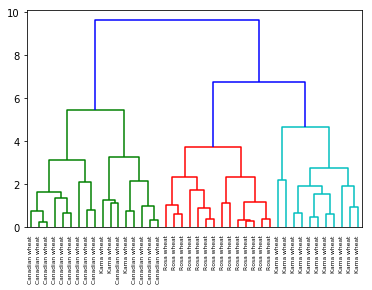

In [0]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

 Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. 
 
 SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the `normalize()` function from sklearn.preprocessing instead of Normalizer.

In [0]:
#@title
companies = ['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [0]:
len(companies)

60

In [0]:
# Import normalize
from sklearn.preprocessing import normalize

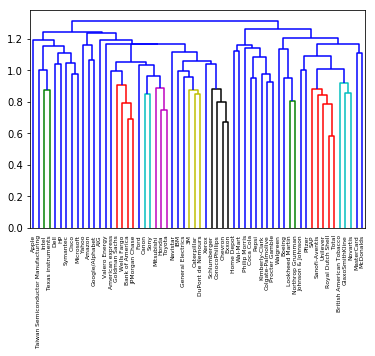

In [0]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

#### Cluster labels in hierarchical clustering

In **complete linkage**, the distance between clusters is the distance between the furthest points of the clusters. 

In **single linkage**, the distance between clusters is the distance between the closest points of the clusters.

Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. 

In [0]:
eurovision = pd.read_csv('/content/eurovision-2016.csv')
eurovision.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [0]:
#@title
samples = np.array([[  2.,  12.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,  10.,   0.,   4.,   0.,   5.,   7.,   0.,   0.,
          3.,   0.,   6.,   0.],
       [ 12.,   0.,   4.,   0.,   0.,   0.,   0.,   6.,   0.,   7.,   8.,
          0.,   3.,   0.,   0.,   0.,   0.,   5.,   1.,  12.,   0.,   0.,
          2.,   0.,  10.,   0.],
       [  0.,  12.,   3.,   0.,  12.,  10.,   0.,   0.,   0.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   6.,   0.,   5.,   0.,   2.,
          0.,   0.,   8.,   4.],
       [  0.,   3.,  12.,   0.,   0.,   5.,   0.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   8.,   4.,   0.,
          7.,   6.,  10.,   0.],
       [  0.,   2.,   0.,  12.,   0.,   8.,   0.,   0.,   0.,   4.,   1.,
          0.,   7.,   6.,   0.,   0.,   0.,   5.,   3.,  12.,   0.,   0.,
          0.,   0.,  10.,   0.],
       [  7.,   1.,   0.,   8.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   0.,   0.,   5.,   0.,   0.,   6.,  12.,   0.,   0.,
          2.,   0.,  10.,   0.],
       [  7.,   4.,   3.,   0.,  12.,   5.,   0.,   0.,   0.,   8.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   6.,   0.,   0.,
          1.,  10.,   2.,   0.],
       [  0.,   3.,   5.,   8.,   0.,   2.,  10.,   0.,   0.,   4.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,  12.,   0.,
          0.,   0.,   7.,   0.],
       [  8.,   5.,   4.,   1.,   0.,  12.,   0.,   7.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   6.,  12.,   0.,   0.,
          3.,   0.,  10.,   0.],
       [  0.,   5.,   6.,   0.,   0.,   1.,  12.,   0.,   0.,   2.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   4.,   8.,  12.,   0.,
          7.,   0.,  10.,   0.],
       [  8.,   5.,   0.,   0.,   0.,  12.,   0.,  12.,   0.,   6.,   0.,
          0.,   4.,   0.,   0.,   0.,   3.,   0.,   2.,  10.,   0.,   0.,
          1.,   0.,   7.,   0.],
       [  8.,   1.,   4.,   6.,   0.,   5.,   0.,   0.,  12.,   0.,   0.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   7.,  10.,   0.,   0.,
          2.,   0.,  12.,   0.],
       [  0.,  10.,   1.,   0.,   8.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   6.,   0.,   5.,   4.,   0.,   0.,
         12.,   7.,   3.,   0.],
       [  0.,   4.,   6.,   0.,   0.,   0.,   0.,   3.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   7.,   5.,   0.,   1.,  12.,   0.,   0.,
         10.,   0.,   8.,   0.],
       [  7.,   3.,   0.,   0.,   4.,  10.,   5.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   8.,  12.,   0.,
          0.,   0.,   6.,   0.],
       [  0.,   7.,   6.,   0.,   0.,   4.,   0.,   1.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   5.,   8.,   0.,   0.,
         10.,   0.,  12.,   0.],
       [ 12.,   0.,   8.,   0.,   4.,   5.,   0.,   0.,   0.,  12.,   0.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   7.,   6.,   0.,   1.,
          2.,   0.,  10.,   0.],
       [ 12.,   1.,   0.,   7.,   0.,   3.,   0.,   0.,   0.,   0.,  12.,
          0.,   2.,   0.,   0.,   6.,   5.,   0.,   4.,   8.,   0.,   0.,
          0.,   0.,  10.,   0.],
       [  2.,   5.,   7.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,
         12.,   0.,   0.,   1.,   0.,   0.,   0.,  10.,  12.,   0.,   0.,
          8.,   3.,   6.,   0.],
       [  8.,   5.,   1.,   0.,   0.,   7.,   0.,  12.,   0.,   4.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   3.,  10.,   0.,   0.,
          0.,   0.,   6.,   0.],
       [  0.,   3.,   6.,   0.,   0.,   4.,   0.,   5.,   0.,   1.,   0.,
          0.,  12.,   0.,   0.,   0.,   0.,   0.,   8.,  10.,   0.,   0.,
          7.,   2.,  12.,   0.],
       [  0.,   8.,   2.,   1.,   3.,   0.,   0.,   0.,   0.,   5.,   0.,
          0.,   0.,   0.,   0.,   0.,   4.,   0.,  10.,   7.,   0.,   0.,
         12.,   6.,   0.,   0.],
       [  0.,   6.,   1.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   7.,  12.,   0.,  10.,   8.,   0.,   0.,
          2.,   0.,   4.,   3.],
       [  6.,   5.,   3.,   2.,   1.,   7.,   0.,   0.,   0.,  12.,   0.,
          0.,   0.,  12.,   0.,   0.,   0.,   0.,   4.,  10.,   0.,   0.,
          0.,   0.,   8.,   0.],
       [  1.,   0.,   0.,   0.,   0.,   7.,   0.,   6.,   0.,   5.,   3.,
          0.,   0.,   0.,  12.,   0.,   2.,   0.,  10.,   8.,   4.,   0.,
          0.,   0.,  12.,   0.],
       [  0.,   6.,   4.,   3.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,  12.,   8.,   0.,   5.,  12.,   0.,   0.,
          7.,   0.,  10.,   0.],
       [  0.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   4.,
          0.,   2.,   0.,   0.,  12.,  12.,   0.,   6.,   8.,   0.,   0.,
          7.,   0.,  10.,   0.],
       [  0.,  12.,   0.,   6.,   0.,   8.,   0.,   0.,   0.,   2.,   0.,
          0.,   5.,   0.,   7.,   0.,   0.,  12.,   0.,  10.,   0.,   0.,
          0.,   3.,   4.,   1.],
       [  7.,   5.,   4.,   8.,   0.,   2.,   0.,   0.,   0.,   6.,   0.,
          0.,   0.,   0.,   0.,   1.,   3.,   0.,   0.,  12.,   0.,   0.,
          0.,   0.,  10.,   0.],
       [  0.,   0.,   0.,   7.,   0.,   5.,   6.,   0.,   0.,   1.,   0.,
          0.,   3.,   0.,   4.,   0.,   2.,   0.,   0.,  10.,  12.,   0.,
          0.,   0.,   8.,   0.],
       [  0.,   8.,   0.,   0.,   2.,   5.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   3.,  12.,   0.,  10.,   6.,   0.,   0.,
          7.,   0.,   4.,   0.],
       [  2.,   7.,   4.,   0.,   0.,   3.,   0.,   1.,   0.,   0.,   0.,
          0.,   6.,   0.,   0.,   5.,   0.,   0.,  12.,   8.,   0.,   0.,
         10.,   0.,  12.,   0.],
       [ 12.,   4.,   8.,   6.,   0.,   0.,   0.,   7.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   5.,  12.,   0.,   0.,
          2.,   0.,  10.,   0.],
       [  2.,   5.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   6.,   8.,   0.,   7.,  10.,   0.,   0.,
          4.,   0.,  12.,   0.],
       [  2.,   6.,   0.,   0.,   5.,   8.,   4.,   3.,   0.,   0.,   0.,
          0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,  12.,   0.,
          1.,   0.,   7.,   0.],
       [  0.,   3.,   6.,   0.,   0.,   2.,   8.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   4.,  10.,  12.,   0.,
          5.,   0.,   7.,   0.],
       [  6.,   4.,   2.,   0.,   0.,  12.,   0.,   0.,   0.,  10.,   0.,
          0.,   0.,   0.,   3.,   0.,   0.,   0.,   5.,   8.,   0.,  12.,
          1.,   0.,   7.,   0.],
       [  0.,  12.,   5.,   0.,   0.,   4.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   6.,   0.,  10.,   8.,   0.,   1.,
         12.,   2.,   7.,   0.],
       [  0.,   1.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
          8.,   0.,   0.,   7.,   0.,   0.,   0.,   5.,   6.,  12.,   2.,
          0.,   0.,   4.,   0.],
       [  8.,   5.,   6.,   0.,  12.,   1.,   0.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   3.,   0.,   0.,
          2.,  12.,   7.,   0.],
       [  7.,   4.,   0.,  10.,   0.,   2.,   0.,   0.,   0.,   0.,   6.,
          0.,   0.,   0.,   0.,   5.,   3.,   0.,   8.,  12.,   0.,   0.,
          1.,   0.,  12.,   0.],
       [  0.,   6.,   0.,   0.,   0.,   8.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,  12.,   0.,  10.,   7.,   0.,   4.,
          1.,   0.,   5.,  12.]])

In [0]:
samples.shape # (42, 26)

(42, 26)

In [0]:
#@title
country_names = ['Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Montenegro',
 'Norway',
 'Poland',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Ukraine',
 'United Kingdom']

In [0]:
len(country_names)

42

In [0]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

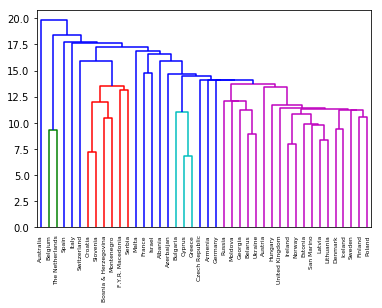

In [0]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

**Extracting the cluster labels**



In [0]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

Perform a flat hierarchical clustering by using the `fcluster()` function on mergings. Specify a maximum height of 6 and the keyword argument `criterion='distance'`.

In [0]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

In [0]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           1           0
2                       1           0           0
3                       0           1           0
4                       1           0           0
5                       0           1           0
6                       1           0           0
7                       0           0           1
8                       1           0           0
9                       1           0           0
10                      0           0           1
11                      0           0           1
12                      0           1           0
13                      0           0           1
14                      0           1           0
15                      0           1           0
16                      1           0           0
17                      0           0           1
18                      1           0           0


#### t-SNE visualization of grain dataset

In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. 

You are given an array samples of grain samples and a list `variety_numbers` giving the variety number of each grain sample.

In [0]:
grains = pd.read_csv('/content/seeds.csv', header=None)
grains.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [0]:
variety_numbers = grains[7].values.tolist()
len(variety_numbers)

210

In [0]:
samples = grains.drop(7, axis=1).values
samples.shape # (210, 7)

(210, 7)

In [0]:
# Import TSNE
from sklearn.manifold import TSNE

In [0]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

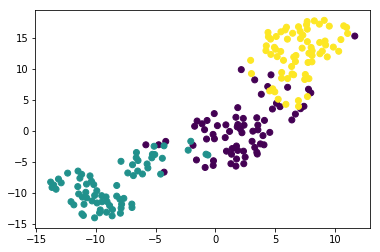

In [0]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! 

In [0]:
movements.shape

(60, 963)

In [0]:
normalized_movements = normalize(movements)

In [0]:
len(companies) # 60

60

In [0]:
# Import TSNE
from sklearn.manifold import TSNE

In [0]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

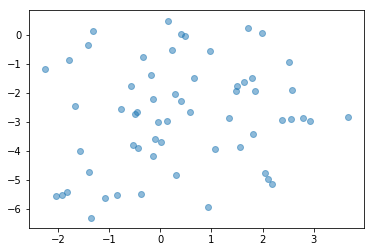

In [0]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

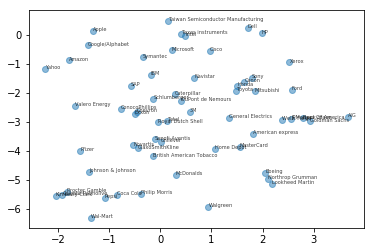

In [0]:
# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

## 3. Decorrelating your data and dimension reduction

#### Visualizing the PCA transformation

In [0]:
grains = pd.read_csv('/content/seeds.csv', header=None)
grains.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [0]:
# match to datacamp
grains = grains[[4, 3]].values
grains.shape # (210, 2)

(210, 2)

In [0]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [0]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

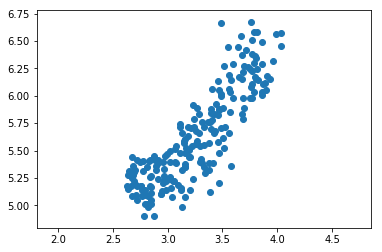

In [0]:
# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [0]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

0.8604149377143467


**Decorrelating the grain measurements with PCA**

In [0]:
# Import PCA
from sklearn.decomposition import PCA

In [0]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

In [0]:
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

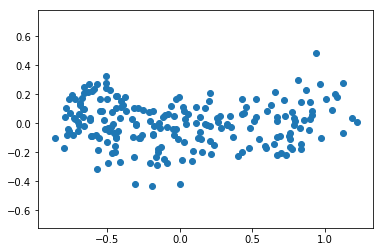

In [0]:
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [0]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

0.0


#### Intrinsic dimension

**The first principal component**

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.


*   Make a scatter plot of the grain measurements. 

*   Create a PCA instance called model.

*   Fit the model to the grains data.

*   Extract the coordinates of the mean of the data using the .mean_ attribute of model.

*   Get the first principal component of model using the .components_[0,:] attribute.

*   Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].



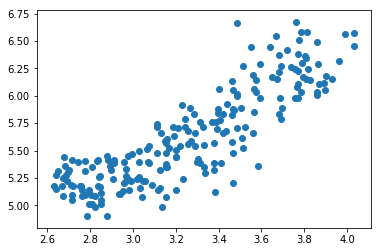

In [0]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

In [0]:
# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

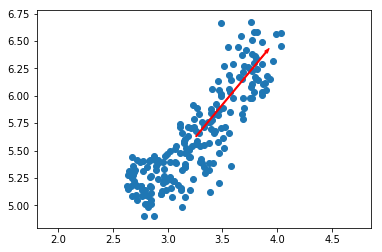

In [0]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

**Variance of the PCA features**

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [0]:
fish = pd.read_csv('/content/fish.csv', header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [0]:
samples = fish.drop(0, axis=1).values
samples.shape # (85, 6)

(85, 6)

In [0]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [0]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

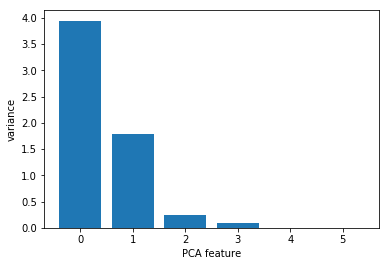

In [0]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#### Dimension reduction with PCA

In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [0]:
from sklearn.preprocessing import scale
scaled_samples = scale(samples)

In [0]:
# Import PCA
from sklearn.decomposition import PCA

In [0]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


**A tf-idf word-frequency array**

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a `csr_matrix`. It has `fit()` and `transform()` methods like other sklearn objects.

You are given a list documents of toy documents about pets.

In [0]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
documents

['cats say meow', 'dogs say woof', 'dogs chase cats']

In [0]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.

In [0]:
# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.

In [0]:
# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


**Clustering Wikipedia**

Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. 

In [0]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [0]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [0]:
wiki = pd.read_csv('/content/wikipedia-vectors.csv', index_col=0)
wiki.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [0]:
# preprocess into the format to be used

from scipy.sparse import csr_matrix
articles = csr_matrix(wiki.transpose())
titles = list(wiki.columns)

In [0]:
articles.shape # (60, 13125)

(60, 13125)

In [0]:
len(titles) # 60

60

In [0]:
# Fit the pipeline to articles
pipeline.fit(articles)

Pipeline(memory=None,
     steps=[('truncatedsvd', TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [0]:
# Calculate the cluster labels: labels
labels = pipeline.predict(articles)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [0]:
# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
29      0                               Jennifer Aniston
22      0                              Denzel Washington
23      0                           Catherine Zeta-Jones
24      0                                   Jessica Biel
25      0                                  Russell Crowe
26      0                                     Mila Kunis
27      0                                 Dakota Fanning
28      0                                  Anne Hathaway
21      0                             Michael Fassbender
20      0                                 Angelina Jolie
30      1                  France national football team
33      1                                 Radamel Falcao
34      1                             Zlatan Ibrahimović
35      1                Colombia national football team
36      1              2014 FIFA World Cup qualification
37      1                                       Football
38      1                      

## 4. Discovering interpretable features

#### Non-negative matrix factorization (NMF)

"NMF" expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. 

You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

In [0]:
articles.shape # (60, 13125)

(60, 13125)

In [0]:
# Import NMF
from sklearn.decomposition import NMF

In [0]:
# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=6, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [0]:
# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40521021e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66676534e-01]
 [3.82064179e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98697155e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81788157e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85578223e-01]
 [1.29294196e-02 1.37891830e-02 7.76324288e-03 3.34490409e-02
  0.00000000e+00 3.34564699e-01]
 [0.00000000e+00 0.00000000e+00 2.06743683e-02 0.00000000e+00
  6.04416039e-03 3.59106459e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.91038541e-01]
 [1.54277972e-02 1.42819337e-02 3.76635058e-03 2.37115576e-02
  2.62589062e-02 4.80835474e-01]
 [1.11741615e-02 3.13682620e-02 3.09487453e-02 6.57009447e-02
  1.96653541e-02 3.38332044e-01]
 [0.00000000e+00 0.00000000e+00 5.30723419e-01 0.0

In [0]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)
df.head()

,0,1,2,3,4,5
HTTP 404,0.000000,0.0,0.0,0.0,0.0,0.440521
Alexa Internet,0.000000,0.0,0.0,0.0,0.0,0.566677
Internet Explorer,0.003821,0.0,0.0,0.0,0.0,0.398697
HTTP cookie,0.000000,0.0,0.0,0.0,0.0,0.381788
Google Search,0.000000,0.0,0.0,0.0,0.0,0.485578


In [0]:
# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

0    0.003846
1    0.000000
2    0.000000
3    0.575721
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64


In [0]:
# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.000000
1    0.005601
2    0.000000
3    0.422388
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


#### NMF learns interpretable parts

Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as model, while words is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

In [0]:
words = pd.read_csv('/content/wikipedia-vocabulary-utf8.txt', header=None)
words = words.values
# txt to array

In [0]:
# txt to list
words = words.values.tolist()
len(words)
# list to array
words = np.asarray(words)
words

array([['aaron'],
       ['abandon'],
       ['abandoned'],
       ...,
       ['zone'],
       ['zones'],
       ['zoo']], dtype='<U18')

In [0]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words) # words in array!

In [0]:
# Print the shape of the DataFrame
print(components_df.shape) # (6, 13125)

(6, 13125)


In [0]:
# Select row 3: component
component = components_df.iloc[3]

In [0]:
# Print result of nlargest
print(component.nlargest())

(film,)       0.627865
(award,)      0.253127
(starred,)    0.245280
(role,)       0.211447
(actress,)    0.186394
Name: 3, dtype: float64


**Explore the LED digits dataset**

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

In [0]:
LED = pd.read_csv('/content/lcd-digits.csv', header=None)
LED.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
samples = LED.values
samples.shape # (100, 104)

(100, 104)

In [0]:
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


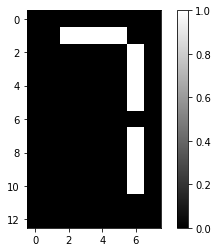

In [0]:
# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [0]:
# to display the image encoded by any 1D array

def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [0]:
# Import NMF
from sklearn.decomposition import NMF

In [0]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

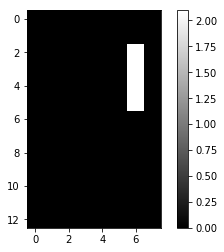

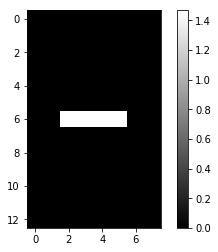

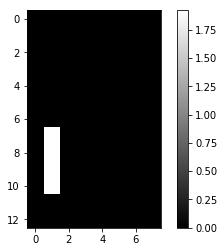

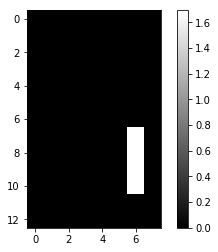

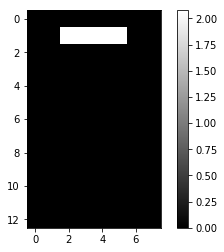

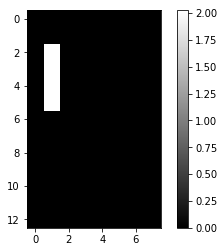

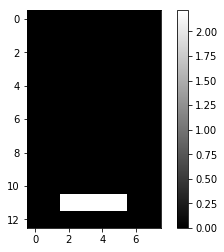

In [0]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!


In [0]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37540618e-16]


In [0]:
samples.shape # (100, 104)

(100, 104)

In [0]:
# Import PCA
from sklearn.decomposition import PCA

In [0]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

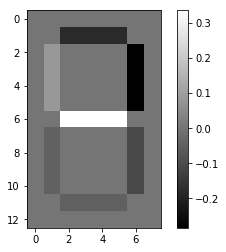

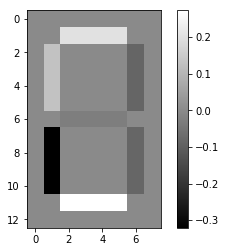

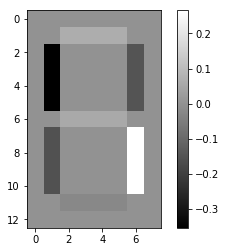

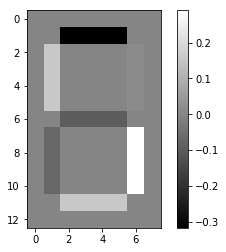

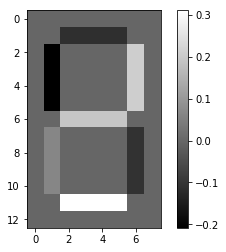

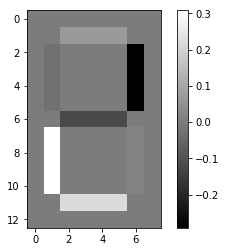

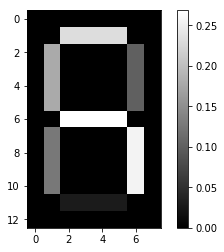

In [0]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

#### Building recommender systems using NMF

In the video, you learned how to use NMF features and the **cosine similarity** to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. 

The NMF features you obtained earlier are available as `nmf_features`, while titles is a list of the article titles.

In [0]:
nmf_features.shape # (60, 6)

(60, 6)

In [0]:
len(titles) # 60

60

In [0]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

In [0]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

df.shape

(60, 6)

In [0]:
# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

Apply the `.dot()` method of df to article to calculate the cosine similarity of every row with article.

In [0]:
# Compute the dot products: similarities
similarities = df.dot(article)

Print the result of the `.nlargest()` method of similarities to display the most similiar articles. 

In [0]:
# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


**Recommend musical artists**

In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose column correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

In [0]:
# dataset is not available
# artists.shape

,0
0,Massive Attack
1,Sublime
2,Beastie Boys
3,Neil Young
4,Dead Kennedys


In [0]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

In [0]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

In [0]:
# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

In [0]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

In [0]:
# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

In [0]:
# Compute cosine similarities: similarities
similarities = df.dot(artist)

In [0]:
# Display those with highest cosine similarity
print(similarities.nlargest())